# Learning Curves


🎯 This exercise consists of using Learning Curves to diagnose the performance of a model in regards to Bias, Variance, and Training size.

👇 Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [14]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import pandas as pd
data = pd.read_csv("../data/Houses.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1756,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
1757,253,60,RL,65.0,8366,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,173000
1758,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Cross validation

👇 Cross validate a Linear Regression model meant to predict sale price (`SalePrice`) according to living area (`GrLivArea`). Save the score as `cv_score`.

In [29]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

x = data[['SalePrice']]
Y = data['GrLivArea']

cv_score = cross_validate(model, x, Y, cv=5)
cv_score = cv_score['test_score'].mean()

#cross_validate(estimator=linalg,x,Y,model)

### ☑️ Test your code

In [30]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_score',
                         score = cv_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/02-Learning-Curves
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_cv_score.py::TestCvScore::test_cv_score PASSED                [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/cv_score.pickle

git commit -m 'Completed cv_score step'

git push origin master


## 2. Learning Curves

Learning curves are used to diagnose the performance of the model in more depth.
 
👇 Plot the learning curves of the model ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)). Use the following `train_sizes`:
- [25,50,75,100,250,500,750,1000,1150]

In [37]:
# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes =([25,50,75,100,250,500,750,1000,1150])
train_sizes

[25, 50, 75, 100, 250, 500, 750, 1000, 1150]

❓ How would you interpret the learning curves?


<details>
<summary> ℹ️ Unfold this cell to see our interpretation </summary>   
    
<br/>

👉 The curves should have converged (be conscious of the scale: sometimes they look apart, but their score is very close!):
- the model has reached optimal performance with the given data
- the model is not overfitting (no variance) the training data, it is generalizing well on unseen data

👉 The score is relatively low (should be around 0.5). Either:
- The model is biased:  it is too simple to learn the patterns of the data
- The model needs **more features** to get better at predicting the house prices
    
</details>


## 3. Adding features

Since we have many more features available, let's add a few to try and increase our model's performance.

👇 Cross validate a model made to predict sale price (`SalePrice`) with:
- Living area (`GrLivArea`)
- Number of bedrooms (`BedroomAbvGr`)
- Number of kitchens (`KitchenAbvGr`)
- Overall quality (`OverallQual`)

Save the new cross validated score under variable name `score_added_features`.

In [47]:
# YOUR CODE HERE
model = LinearRegression()
x = data[['BedroomAbvGr','KitchenAbvGr','OverallQual']]
Y = data['SalePrice']

cv_result = cross_validate(model, x, Y, cv=5)

score_added_features = cv_result['test_score'].mean()

ℹ️ The performance of the model should have increased! Adding features provides the model with additional information to learn and model the pattern of the data.

### ☑️ Test your code

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult('added_features',
                         score = score_added_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/02-Learning-Curves
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_added_features.py::TestAddedFeatures::test_increased_score PASSED [100%]

============================== 1 passed in 0.22s ===============================


💯 You can commit your code:

git add tests/added_features.pickle

git commit -m 'Completed added_features step'

git push origin master


## 4. Learning curves 2

👇 Plot the learning curves of the new model to evaluate its performance further.

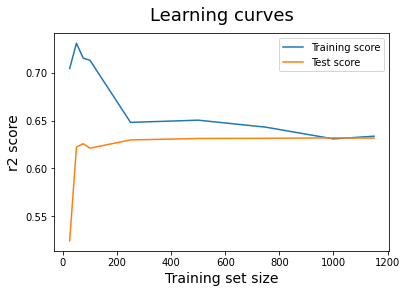

In [66]:
# YOUR CODE HERE
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes = [25,50,75,100,250,500,750,1000,1150]
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=x, y=Y, train_sizes=train_sizes, cv=5)

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores,axis =1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

❓Looking at the new learning curves, how many training examples are sufficient for the model to learn the patterns of the dataset?


<details>
<summary>👉 Answer </summary>   
    
<br/>

From the looks of the graph, the testing score stabilizes at a training size of around 300.
    
</details>


## 5. Reducing training set size

The more data, the longer the training. In certain cases, you will be working with enormous datasets. In those situations, the learning curves can help you find the right tradeoff between reducing the training size (and training time!) while maintaining a high performing model.

👇 Select the first 300 rows of the dataset (deemed sufficient by the learning curves) and save them under variable name `reduced_dataset`.

In [68]:
# YOUR CODE HERE
reduced_dataset = data.head(300)
reduced_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
296,297,50,RM,75.0,13710,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,152000
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
298,299,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,175000


👇 On the `reduced_dataset`, cross-validate a model made to predict sale price (`SalePrice`) with:
- Living area (`GrLivArea`)
- Number of bedrooms (`BedroomAbvGr`)
- Number of kitchens (`KitchenAbvGr`)
- Overall quality (`OverallQual`)

Save the cross validated score under variable name `reduced_dataset_score`.

In [75]:
# YOUR CODE HERE
x = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr','OverallQual']]
Y = data['SalePrice']
model = LinearRegression()
model.fit(x,Y)
cv_result = cross_validate(model,x,Y)
reduced_dataset_score = cv_result['test_score'].mean()

ℹ️ The score should be nearly the same as with the full dataset! On the other hand, you'll have reduced the computational expense.

### ☑️ Test your code

In [76]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_dataset',
                         score = reduced_dataset_score,
                         dataset = reduced_dataset
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/02-Learning-Curves
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_reduced_dataset.py::TestReducedDataset::test_reduced_dataset_score PASSED [ 50%]
tests/test_reduced_dataset.py::TestReducedDataset::test_reduced_dataset_size PASSED [100%]

============================== 2 passed in 0.61s ===============================


💯 You can commit your code:

git add tests/reduced_dataset.pickle

git commit -m 'Completed reduced_dataset step'

git push origin master


## 6. Predict

👇 With a model trained on the **reduced dataset**, predict the price of the following house:

- Living area of 3000 $ft^2$ (`GrLivArea`)
- 2 bedrooms (`BedroomAbvGr`)
- 1 kitchen (`KitchenAbvGr`)
- Overall quality of 5 (`OverallQual`)


Save the predicted price under variable name `prediction`.

In [79]:
# YOUR CODE HERE
result = model.predict([[3000,2,1,5]])
prediction = result[0]

### ☑️ Test your code

In [80]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/02-Learning-Curves
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction_around_250000 PASSED [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁